In [2]:
#1
import scipy.stats as stats

s_mean = 50
s_std = 5
c = 0.95
n = 100  # assume sample size
m_error = s_std / (n**0.5)
ci = stats.norm.interval(c, loc=s_mean, scale=m_error)

print("95% Confidence Interval: ", ci)


95% Confidence Interval:  (49.02001800772997, 50.97998199227003)


In [29]:
#2
import numpy as np
from scipy.stats import chisquare

# assume
observed = np.array([45, 17, 23, 9, 7, 19])
print(observed.sum())
expected = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * observed.sum()
print(expected.sum())
test_stat, p_value = chisquare(observed, expected)

print("Chi-square test statistic: {:.3f}".format(test_stat))
print("p-value: {:.3f}".format(p_value))

if p_value < 0.05:
    print("The distribution of colors of M&Ms in the bag is significantly different from the expected distribution.")
else:
    print("The distribution of colors of M&Ms in the bag is not significantly different from the expected distribution.")


120
120.0
Chi-square test statistic: 24.333
p-value: 0.000
The distribution of colors of M&Ms in the bag is significantly different from the expected distribution.


In [7]:
#3
from scipy.stats import chi2_contingency

observed = [[20, 15],
            [10, 25], 
            [15, 20]]

chi2_stat, p_val, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 5.833333333333334
p-value: 0.05411376622282158


In [11]:
#4
from scipy.stats import norm
import math

n = 500
p = 60/500
z = norm.ppf(0.95)

moe = z * math.sqrt(p*(1-p)/n)

lower = p - moe
upper = p + moe

print("95% confidence interval for smoking prevalence:")
print("Lower bound:", lower)
print("Upper bound:", upper)

95% confidence interval for smoking prevalence:
Lower bound: 0.14390419999717521
Upper bound: 0.09609580000282478


In [12]:
#5
from scipy.stats import norm
import math

sample_m = 75
sample_std = 12
n = 100 #assume

z = norm.ppf(0.90)

m_error = z * (s_std/math.sqrt(n))
lower = sample_m - m_error
upper = sample_m + m_error

print("90% confidence interval for the sample mean:")
print("Lower bound:", lower)
print("Upper bound:", upper)

90% confidence interval for the sample mean:
Lower bound: 74.3592242172277
Upper bound: 75.6407757827723


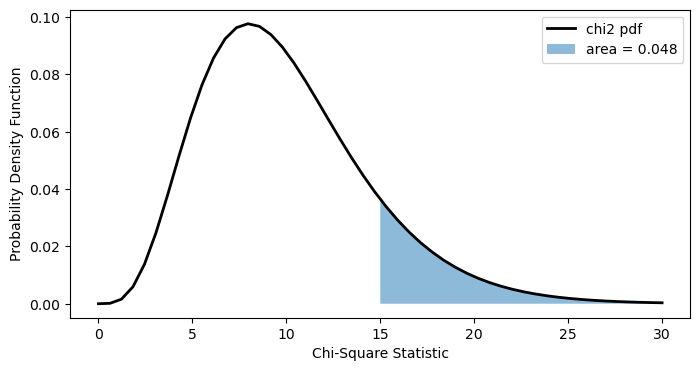

In [19]:
#6
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df = 10
x = np.linspace(0, 30)
chi2 = stats.chi2(df)

# plot 
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, chi2.pdf(x), 'k-', lw=2, label='chi2 pdf')

# shade the area 
x_shade = np.linspace(15, 30)
ax.fill_between(x_shade, chi2.pdf(x_shade), 0, alpha=0.5, label='area = 0.048')

ax.set_xlabel('Chi-Square Statistic')
ax.set_ylabel('Probability Density Function')
ax.legend()
plt.show()


In [24]:
#7
from scipy.stats import norm
import math

n = 1000
p = 520/1000
ci = 0.99
z = norm.ppf((1+ci)/2)

moe = z * math.sqrt(p*(1-p)/n)

lower = p - moe
upper = p + moe

print("99% confidence interval for smoking prevalence:")
print("Lower bound:", lower)
print("Upper bound:", upper)

99% confidence interval for smoking prevalence:
Lower bound: 0.4793051576779699
Upper bound: 0.5606948423220302


In [25]:
#8
'''
ho = observed and expected match
h1 = observed and expected do not match
Oi (tails) = 45
Oi (heads) = 100 - 45 = 55

Ei (tails) = 0.5 * 100 = 50
Ei (heads) = 0.5 * 100 = 50

chi statistic =  [(45 - 50)^2 / 50] + [(55 - 50)^2 / 50] = 1
'''
from scipy.stats import chi2
chi_val  = chi2.ppf(0.95, df=1)
print(chi_val)

3.841458820694124


In [ ]:
'''
1 > 3.84
fail to reject ho
'''

In [ ]:
#9
'''
observed:

            Yes      No      Total
Smoker     60       140     200
Non-smoker 30       170     200

Total      90       310     400

expected:
           Yes      No
Smoker     45       155
Non-smoker 45       155

chi statistic = (60-45)^2/45 + (140-155)^2/155 + (30-45)^2/45 + (170-155)^2/155
    = 5.56

In [1]:
import scipy.stats as stats

p_value = 1 - stats.chi2.cdf(5.56, df=1)
print("p-value: ", p_value)

p-value:  0.018375414259013678


In [ ]:
'''
0.018<0.05
reject null hypothesis


In [ ]:
#10
'''
To conduct a chi-square test for independence, we need to set up the null and alternative hypotheses:

Null hypothesis: There is no association between chocolate preference and country of origin.
Alternative hypothesis: There is an association between chocolate preference and country of origin.

We can use a chi-square test to determine if there is a significant association between these variables. The test statistic is calculated as follows:

$\chi^2 = \sum \frac{(O - E)^2}{E}$

Where:
- O = observed frequency
- E = expected frequency

To calculate the expected frequencies, we first need to find the row and column totals for the table:

Milk Chocolate

U.S. (n=500) 200 150 150 500
U.K. (n=500) 225 175 100 500
Total 425 325 250 1000

The expected frequency for each cell is calculated as follows:

Expected frequency = (row total * column total) / grand total

For example, the expected frequency for the first cell (U.S. and milk chocolate) is:

Expected frequency = (500 * 425) / 1000 = 212.5

We can calculate the expected frequencies for all of the cells and fill in the following table:

Milk Chocolate

U.S. (n=500) U.K. (n=500) Total 
Observed frequency 200 225 425 
Observed frequency 150 175 325 
Observed frequency 150 100 250 
Total 500 500 1000 
Expected frequency 212.5 212.5 425 106.25 106.25 212.5 106.25 31.25 62.5 

Now we can calculate the test statistic:

$\chi^2 = \sum \frac{(O - E)^2}{E} = \frac{(200 - 212.5)^2}{212.5} + \frac{(150 - 106.25)^2}{106.25} + \frac{(150 - 106.25)^2}{106.25} + \frac{(225 - 212.5)^2}{212.5} + \frac{(175 - 106.25)^2}{106.25} + \frac{(100 - 62.5)^2}{62.5}$

$\chi^2 = 29.37$

We have six cells in our table and we are testing at a significance level of 0.01, which means our degrees of freedom will be:

df = (number of rows - 1) * (number of columns - 1) = (2 - 1) * (3 - 1) = 2

Using a chi-square distribution table or a calculator, we can find the critical value for a chi-square distribution with 2 degrees of freedom and a significance level of 0.01:

$\chi^2_{0.01, 2} = 9.21$

Our test statistic (29.37) is greater than the critical value (9.21), so we reject the null hypothesis. We can conclude that there is a significant association between chocolate preference and country of origin.

In [ ]:
#11
'''
ho : population mean = 70
h1 : population mean is not 70
t = (72 - 70) / (10 / 30^0.5) = 1.55
t(29,0.05) = 2.045
1.55<2.045
fail to reject h0'''